In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [5]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [6]:
df=dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df[['month', 'year', 'Temperature', 'RH', 'Ws']]=df[['month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [9]:
df[['DC', 'FWI']] = df[['DC', 'FWI']].apply(pd.to_numeric, errors='coerce')  # Convert invalid values to NaN
df.dropna(subset=['DC', 'FWI'], inplace=True)  # Drop rows with NaN values

In [10]:
df[['DC', 'FWI']] = df[['DC', 'FWI']].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int32  
 2   year         121 non-null    int32  
 3   Temperature  121 non-null    int32  
 4   RH           121 non-null    int32  
 5   Ws           121 non-null    int32  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int32(5), int64(1), object(1)
memory usage: 11.8+ KB


In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,121.000000,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,15.768595,7.504132,2012.0,33.132231,56.057851,14.983471,0.682645,81.038017,17.066116,45.670248,5.838017,17.965289,8.504959
std,8.878589,1.118958,0.0,3.674103,15.686139,2.689434,1.492296,12.274182,13.043604,43.013408,4.815068,13.919595,8.169444
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,44.000000,14.000000,0.000000,77.500000,7.200000,14.700000,1.800000,7.300000,0.900000
50%,16.000000,8.000000,2012.0,34.000000,56.000000,15.000000,0.000000,84.700000,13.300000,32.100000,4.500000,14.100000,6.000000
75%,23.000000,8.000000,2012.0,36.000000,67.000000,16.000000,0.500000,89.300000,23.000000,57.100000,8.400000,23.900000,13.700000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


In [13]:
df_copy=df.drop(['day', 'month', 'year'],axis=1)

In [14]:
# Ensure the column is of string type
df_copy['Classes'] = df_copy['Classes'].astype(str)

# Apply the condition
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [15]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


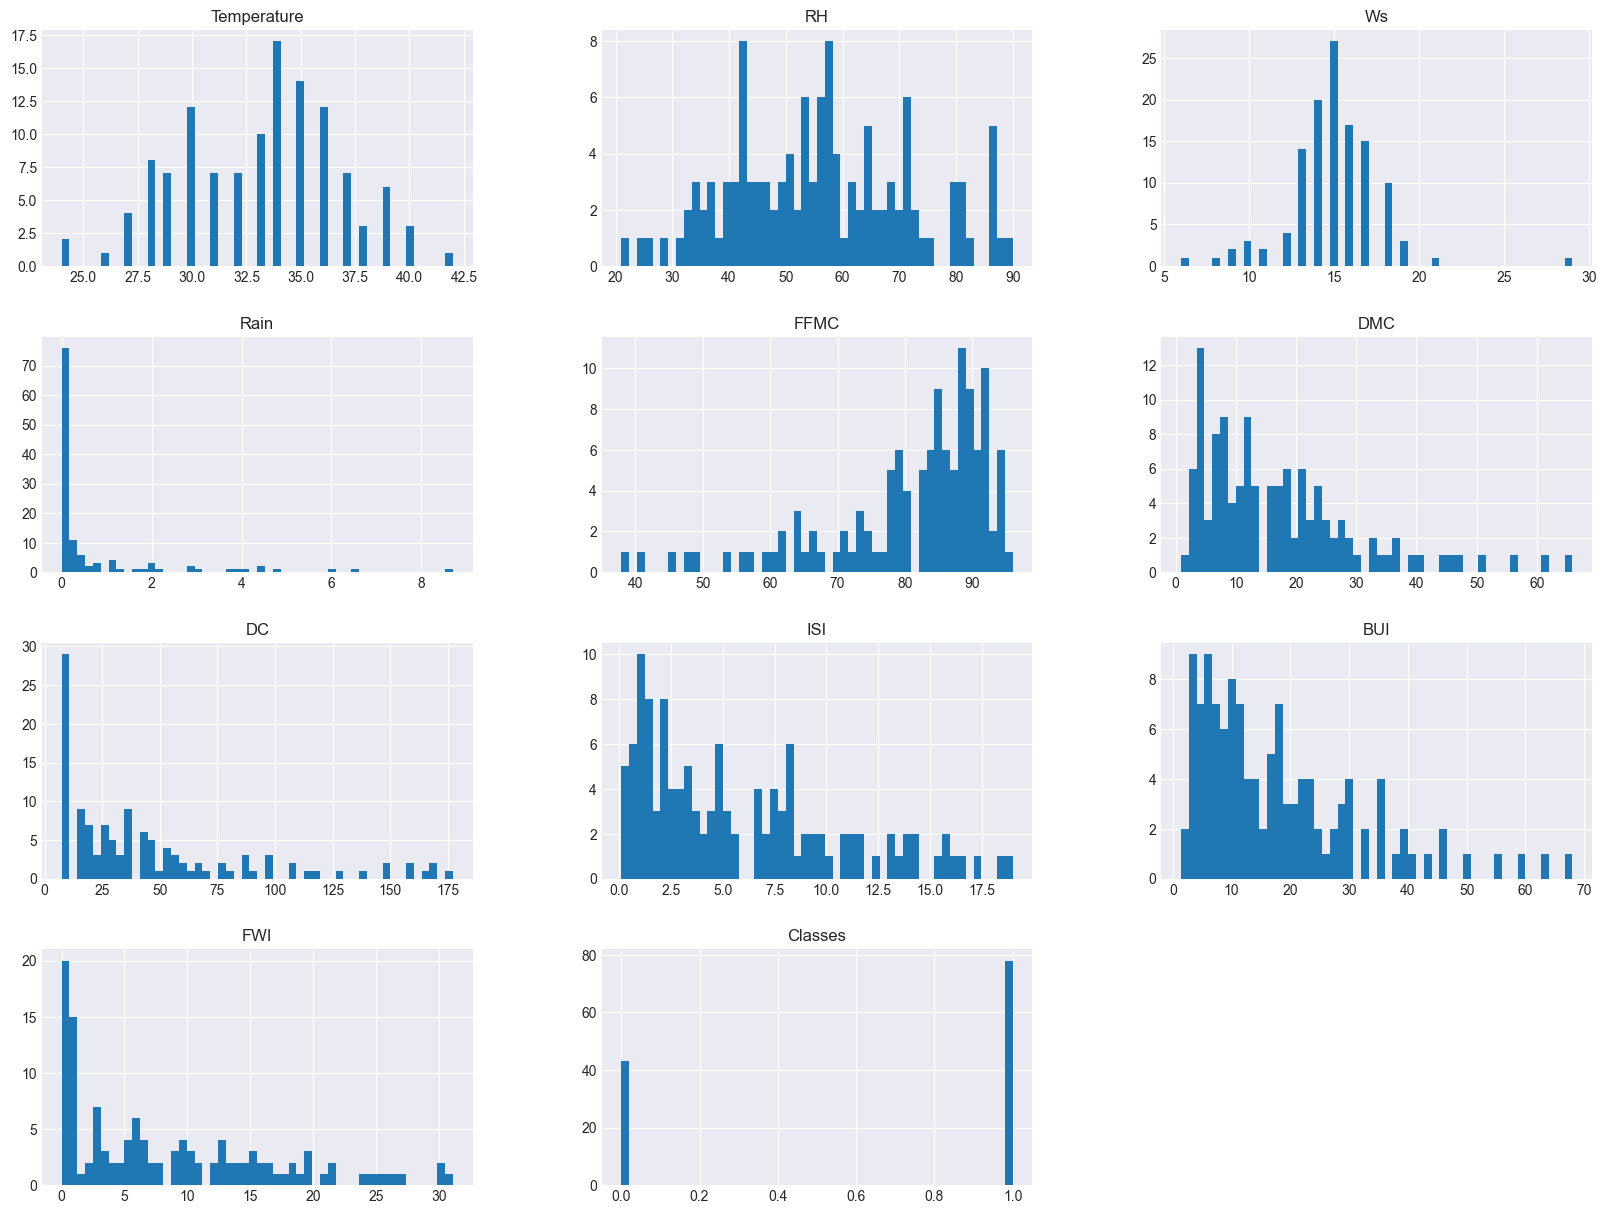

In [16]:
import matplotlib.pyplot as plt

# Check available styles
print(plt.style.available)

# Use a valid style
plt.style.use('seaborn-v0_8-darkgrid')  # Replace with a valid style name from the list

# Plot histograms
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [18]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [20]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [21]:
df['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

In [22]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.552250,-0.195463,-0.133734,0.595813,0.423831,0.350583,0.570669,0.410577,0.533052
RH,-0.552250,1.000000,0.065450,0.162716,-0.664334,-0.397228,-0.297790,-0.708345,-0.382159,-0.444018
Ws,-0.195463,0.065450,1.000000,-0.122810,0.057997,0.061610,0.045812,0.129770,0.061682,0.071267
Rain,-0.133734,0.162716,-0.122810,1.000000,-0.509788,-0.336032,-0.345108,-0.408057,-0.345952,-0.455641
FFMC,0.595813,-0.664334,0.057997,-0.509788,1.000000,0.573345,0.498119,0.765886,0.572751,0.793373
DMC,0.423831,-0.397228,0.061610,-0.336032,0.573345,1.000000,0.919985,0.659539,0.992353,0.526672
DC,0.350583,-0.297790,0.045812,-0.345108,0.498119,0.919985,1.000000,0.523486,0.942047,0.485562
ISI,0.570669,-0.708345,0.129770,-0.408057,0.765886,0.659539,0.523486,1.000000,0.647005,0.700990
BUI,0.410577,-0.382159,0.061682,-0.345952,0.572751,0.992353,0.942047,0.647005,1.000000,0.546303
Classes,0.533052,-0.444018,0.071267,-0.455641,0.793373,0.526672,0.485562,0.700990,0.546303,1.000000


<Axes: >

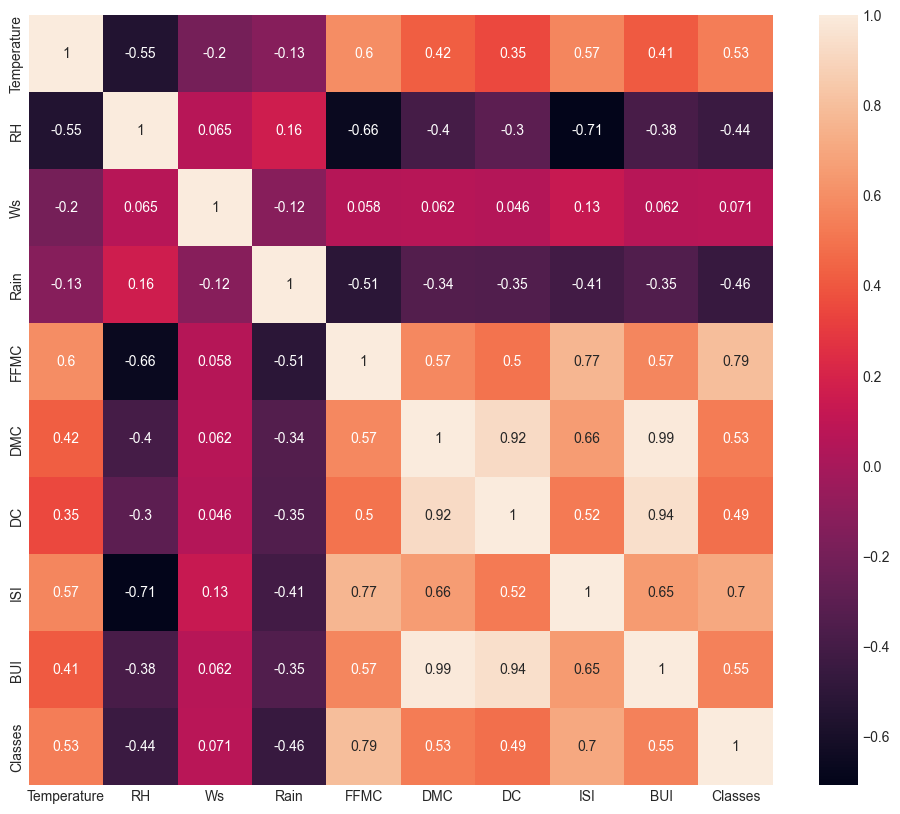

In [25]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [26]:
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-8.51668064e-01, -2.51742157e-01,  1.08750144e-01,
         8.19290293e-01, -6.81604600e-01, -4.21950065e-01,
        -9.07545918e-01, -1.32017315e+00],
       [-1.12420184e+00,  2.03434878e+00,  1.08750144e-01,
        -2.05489748e-01, -2.69284721e+00, -9.35240956e-01,
        -1.16652360e+00, -1.32017315e+00],
       [-1.39673563e+00,  9.23961756e-01,  1.08750144e-01,
        -4.61684758e-01, -6.77313546e-02, -2.50853101e-01,
        -6.91731184e-01, -1.32017315e+00],
       [ 2.41873730e+00, -2.08061491e+00, -2.39685317e+00,
        -4.61684758e-01,  1.23271065e+00,  9.25438526e-01,
         2.17860478e+00,  7.57476397e-01],
       [-8.51668064e-01,  2.09966567e+00, -3.08850408e-01,
        -4.61684758e-01,  1.42277914e-01, -7.64143992e-01,
        -5.62242344e-01,  7.57476397e-01],
       [ 2.38467058e-01,  9.23961756e-01,  5.26350695e-01,
        -4.61684758e-01,  4.24982698e-01, -3.22143502e-01,
        -4.42869819e-02,  7.57476397e-01],
       [ 5.11000838e-01,  6.626942

1.3850534190255763
0.7842064273855882


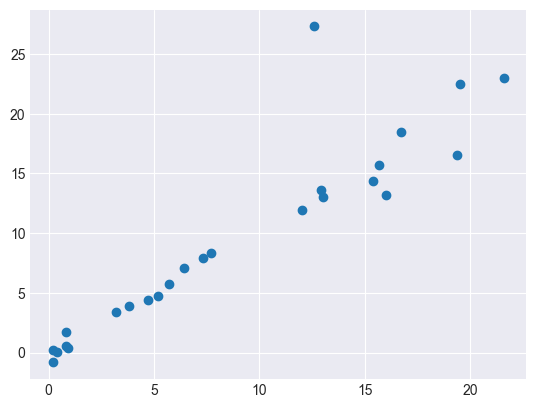

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.41431452057107
0.8508628790268641


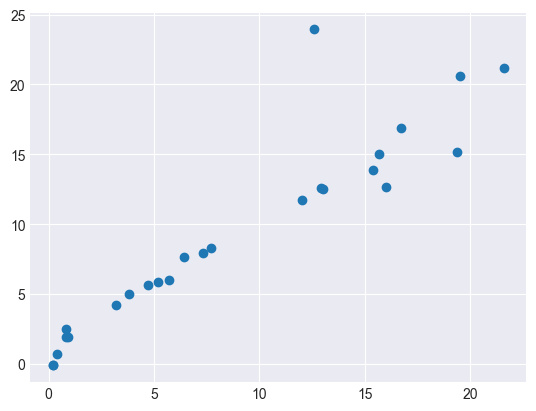

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.323676441535722
0.7976833595699788


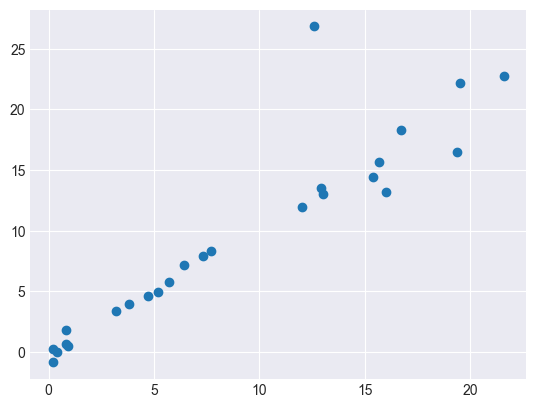

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.9089614225520075
0.8685666501796805


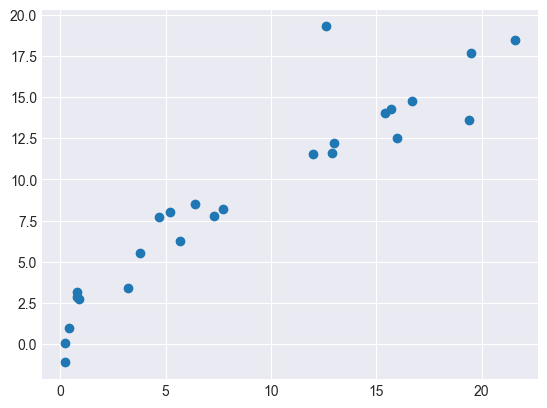

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.378575754397731
0.7856633350341423


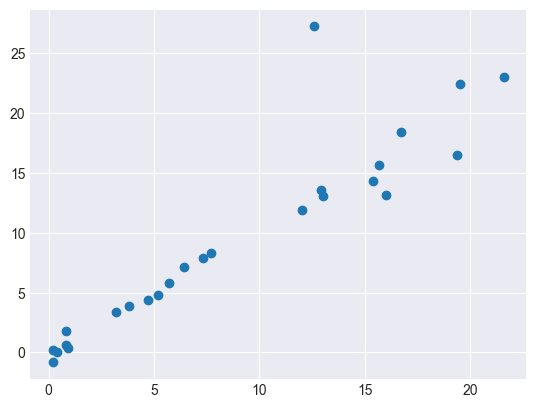

In [33]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=RidgeCV(cv=5)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.3272393478547153
0.7968142527447801


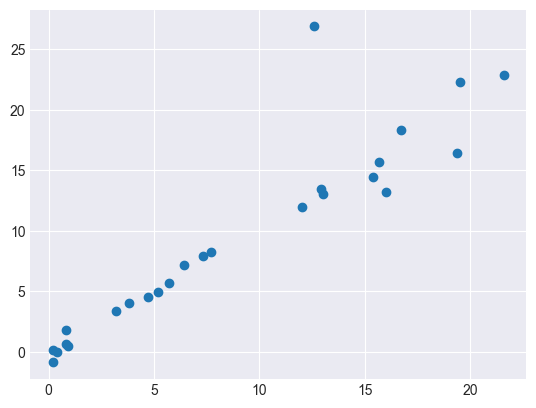

In [34]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNetCV()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

In [36]:
scaler

StandardScaler()

In [37]:
ridge

RidgeCV(cv=5)

In [38]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))